In [22]:
# importing libraries
from __future__ import division
import numpy as np#
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("white")
from scipy import stats
import pandas as pd
import itertools

sns.set_style('whitegrid')
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Individual means and variances

In [30]:
data_noa = pd.read_csv("./data/means_and_variances.csv")
data_noa.head()

,real_days_1,spell_d,sex_d,college,lmu_i,lsig_i
0,23,0,1,0,NaN,NaN
1,6,1,1,0,2.463627,0.902812
2,780,0,1,1,NaN,NaN
3,45,1,1,1,5.232978,4.068753
4,11,0,1,0,NaN,NaN


In [31]:
first_s_college = data_noa[np.logical_and(data_noa.spell_d==0,data_noa.college==1)].real_days_1.values
secnd_s_college = data_noa[np.logical_and(data_noa.spell_d==1,data_noa.college==1)].real_days_1.values

first_s_ncollege = data_noa[np.logical_and(data_noa.spell_d==0,data_noa.college==0)].real_days_1.values
secnd_s_ncollege = data_noa[np.logical_and(data_noa.spell_d==1,data_noa.college==0)].real_days_1.values

In [33]:
data_noa[np.logical_and(data_noa.spell_d==0,data_noa.college==1)].real_days_1.describe()

count    49391.000000
mean       210.069669
std        361.012945
min          1.000000
25%         21.000000
50%         84.000000
75%        249.000000
max       7211.000000
Name: real_days_1, dtype: float64

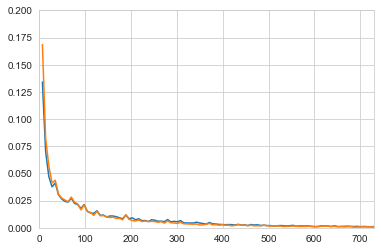

In [51]:
h_c1, bins_c1 = np.histogram(first_s_college, bins= np.arange(0,365*4,7))
h_c2, bins_c2 = np.histogram(secnd_s_college, bins= np.arange(0,365*4,7))
plt.plot(bins_c1[1:],h_c1/np.sum(h_c1))
plt.plot(bins_c2[1:],h_c2/np.sum(h_c2))
plt.xlim(0,2*365)
plt.ylim(0,0.2)
plt.show()

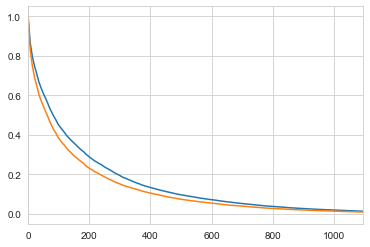

In [65]:
h_c1, bins_c1 = np.histogram(first_s_college, bins= np.arange(0,365*4,7))
h_c2, bins_c2 = np.histogram(secnd_s_college, bins= np.arange(0,365*4,7))
plt.plot(bins_c1,np.hstack((1,1-np.cumsum(h_c1)/np.sum(h_c1))))
plt.plot(bins_c2,np.hstack((1,1-np.cumsum(h_c2)/np.sum(h_c2))))
plt.xlim(0,3*365)
# plt.ylim(0,0.2)
plt.show()

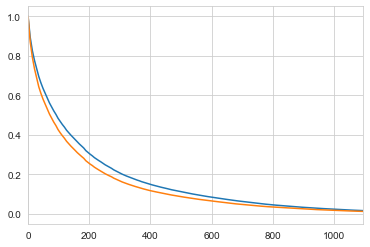

In [64]:
h_c1, bins_c1 = np.histogram(first_s_ncollege, bins= np.arange(0,365*4,7))
h_c2, bins_c2 = np.histogram(secnd_s_ncollege, bins= np.arange(0,365*4,7))
plt.plot(bins_c1,np.hstack((1,1-np.cumsum(h_c1)/np.sum(h_c1))))
plt.plot(bins_c2,np.hstack((1,1-np.cumsum(h_c2)/np.sum(h_c2))))
plt.xlim(0,3*365)
# plt.ylim(0,0.2)
plt.show()

# Other legacy code
--------------------------------------

In [9]:
data_noa = pd.read_csv("./data/STU_SpellAdj.csv")
data_noa.head()

,real_days_1,n_spell_u,yin,mu_i,sig_i,educ2,sex_d,state,state2,U_ghost,state_past
0,23,1,1996,NaN,NaN,2.0,1,U,U,NaN,T
1,6,2,1996,14.5,144.5,2.0,1,T,U,1.0,T
2,780,1,1996,NaN,NaN,4.0,1,U,U,NaN,P
3,45,2,1998,412.5,270112.5,4.0,1,T,U,1.0,T
4,11,1,1999,NaN,NaN,2.0,1,T,U,1.0,T


In [15]:
data_noa = data_noa[np.logical_or(data_noa['state_past']=="P",data_noa['state_past']=="T")]

In [16]:
data_noa.groupby('state_past').describe()['real_days_1']

,count,mean,std,min,25%,50%,75%,max
state_past,,,,,,,,
P,197663.0,246.108022,441.509540,1.0,21.0,94.0,285.0,11668.0
T,448721.0,202.512356,371.406704,1.0,21.0,78.0,220.0,8455.0


In [4]:
data_noa = pd.read_csv("./MS96_noA_lite.csv")
data_noa.head()

,id,jobcount,dtin,dtout,state,sex_d,educ2,year_in,real_days_1,state_future,state_past,nuc,nup
0,48,9,01oct1996,21oct1996,U,1,2.0,1996,23,T,T,1.0,1
1,48,10,23oct1996,13may1997,T,1,2.0,1996,6,T,T,NaN,2
2,48,14,06apr2002,14may2002,U,1,2.0,2002,40,T,T,2.0,4
3,63,29,07sep1996,06sep1997,U,1,4.0,1996,780,T,P,1.0,1
4,63,30,26oct1998,18dec1998,T,1,4.0,1998,45,P,T,NaN,2


In [5]:
data_noa = data_noa[data_noa.nup<3]
data_noa.head()

,id,jobcount,dtin,dtout,state,sex_d,educ2,year_in,real_days_1,state_future,state_past,nuc,nup
0,48,9,01oct1996,21oct1996,U,1,2.0,1996,23,T,T,1.0,1
1,48,10,23oct1996,13may1997,T,1,2.0,1996,6,T,T,NaN,2
3,63,29,07sep1996,06sep1997,U,1,4.0,1996,780,T,P,1.0,1
4,63,30,26oct1998,18dec1998,T,1,4.0,1998,45,P,T,NaN,2
5,66,27,17jun1999,25jun1999,T,1,2.0,1999,11,T,T,NaN,1


In [7]:
gb = data_noa.groupby("id")

In [8]:
gb.describe(

In [ ]:
by id: egen mu_i = mean(real_days_1)
by id: replace mu_i = . if nup==1

*-*-*-* mu hat bar y *-*-*-*

egen N = count(mu_i)
egen mu_y = mean(mu_i)

*-*-*-* sigma i hat *-*-*-*

by id : gen sig_i = ((real_days_1[1]-real_days_1[2])^2)/2 if nup==2

*-*-*-* sigma y bar hat *-*-*-*

by id : gen sigyi = real_days_1[1]^2 + real_days_1[2]^2 - 2*mu_y^2 if mu_i!=.

gen sig_y = sum(sigyi)/(2*N-1)
replace sig_y = sig_y[_N]